## Predictive-Analysis-of-Startup-Acquisition-Status

### Introduction
Study the funding analysis of startuo companies and their present financial state

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
company.tail()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN
196552,c:9998,196552,Company,9998,NaN,Closet Couture,closet couture,/company/closet-couture,ecommerce,operating,...,2006-07-01,2008-09-10,2.0,1.0,NaN,2008-08-24 16:46:13,2013-03-23 12:01:50,34.035633,-118.515590,NaN


In [4]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [5]:
company.shape

(196553, 44)

In [6]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [7]:
del company['region']
del company['city']
del company['state_code']

In [8]:
company.shape

(196553, 41)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [9]:
del company['id']
del company['Unnamed: 0.1']
del company['entity_id']
del company['parent_id']
del company['created_by']
del company['created_at']
del company['updated_at']
del company['entity_type']

In [10]:
company.shape

(196553, 33)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [11]:
del company['domain'] 
del company['homepage_url']
del company['twitter_username'] 
del company['logo_width']
del company['logo_url']
del company['logo_height']
del company['short_description']
del company['description']
del company['overview']
del company['tag_list']
del company['name']
del company['normalized_name']
del company['permalink']
del company['invested_companies']

In [12]:
company.shape

(196553, 19)

#### 1.d. Delete duplicate values if found any.

In [13]:
# Delete duplicate values if found any.
company.duplicated().sum()

87089

In [14]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.


In [15]:
# Let's delete all the duplicate values
df = company.drop_duplicates()

In [16]:
# check if any left
df.duplicated().sum()

0

In [17]:
df.shape

(109464, 19)

#### 1.e. Delete those which has more than 98% of null values.

In [18]:
df.isnull().sum().sort_values(ascending=False)

ROI                    108738
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

In [19]:
# # Since we can see only nan values so et's check how much of ros has nan values.
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending= False)

ROI                    99.336768
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
closed_at              97.607433
funding_total_usd      74.546883
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
founded_at             24.586165
country_code           22.719798
category_code          11.172623
status                  0.000000
dtype: float64

In [20]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
del df['ROI']

In [21]:
df.shape

(109464, 18)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [22]:
df.fillna(method='ffill', axis=0, inplace=True)

In [23]:
df.isnull().sum().sort_values(ascending=False)

first_investment_at    31
last_investment_at     31
investment_rounds      27
closed_at              16
category_code           0
funding_total_usd       0
lat                     0
relationships           0
milestones              0
last_milestone_at       0
first_milestone_at      0
last_funding_at         0
funding_rounds          0
status                  0
first_funding_at        0
country_code            0
founded_at              0
lng                     0
dtype: int64

In [24]:
df['investment_rounds'].fillna(method='bfill', axis=0, inplace=True)

In [25]:
df['closed_at'].fillna(method='bfill', axis=0, inplace=True)
df['first_investment_at'].fillna(method='bfill', axis=0, inplace=True)
df['last_investment_at'].fillna(method='bfill', axis=0, inplace=True)

In [26]:
# Since we can see only nan values so et's check how much of rows has nan values.
df.isnull().sum().sort_values(ascending=False)

category_code          0
status                 0
lat                    0
relationships          0
milestones             0
last_milestone_at      0
first_milestone_at     0
funding_total_usd      0
funding_rounds         0
last_funding_at        0
first_funding_at       0
investment_rounds      0
last_investment_at     0
first_investment_at    0
country_code           0
closed_at              0
founded_at             0
lng                    0
dtype: int64

In [27]:
df.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,6.0,34.021122,-118.396467
2,games_video,acquired,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
4,games_video,operating,2008-07-26,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525


#### 2.b.1.  Find outliers

<AxesSubplot:xlabel='funding_total_usd'>

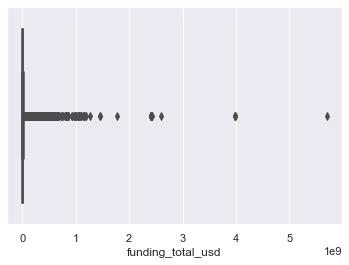

In [28]:
sns.boxplot(df['funding_total_usd'])

<AxesSubplot:xlabel='funding_rounds'>

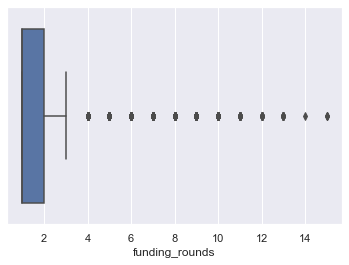

In [29]:
sns.boxplot(df['funding_rounds'])

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


In [30]:
# Q1 =  np.percentile(df['funding_total_usd'],25)
# Q3 =  np.percentile(df['funding_total_usd'],75)
# IQR = Q3-Q1
# print('old shape: ' df.shape())
# upper = np.where(df['funding_total_usd']>= (Q3+1.5*IQR))
# lower = np.where

#### 2.b.1. Find the IQR

In [31]:
# ft_q1 = np.percentile(df['funding_total_usd'],25)

# ft_q3 = np.percentile(df['funding_total_usd],75)

In [32]:
# For funding_total_usd
ft_q1 = df['funding_total_usd'].quantile(0.25)
ft_q3 = df['funding_total_usd'].quantile(0.75)
iqr_1 = ft_q3-ft_q1


In [33]:
# For funding_rounds
fr_q1 = df['funding_rounds'].quantile(0.25)
fr_q3 = df['funding_rounds'].quantile(0.75)
iqr_2 = fr_q3-fr_q1

In [34]:
print('IQR for total_usd:', iqr_1)
print('IQR for funding_rounds:', iqr_2)

IQR for total_usd: 9819146.75
IQR for funding_rounds: 1.0


#### 2.b.1. Find the Upper and Lower limit

In [35]:
# For funding_total_usd
ft_upper_limit = ft_q3 + (1.5 * iqr_1)
ft_lower_limit = ft_q1 - (1.5 * iqr_1)
print('upper limit for funding_total_usd is:', ft_upper_limit, 'and lower limit is:',ft_lower_limit)



upper limit for funding_total_usd is: 25037695.125 and lower limit is: -14238891.875


In [36]:
# For funding_rounds
fr_upper_limit = fr_q3 + (1.5 * iqr_2)
fr_lower_limit = fr_q1 - (1.5 * iqr_2)
print('upper limit for funding_rounds is:', fr_upper_limit, 'and lower limit is:',fr_lower_limit)

upper limit for funding_rounds is: 3.5 and lower limit is: -0.5


In [37]:
#Data filtering
df[df['funding_total_usd']>ft_upper_limit ]
 
# For funding_total_usd(capping)
rem_ot1 = df.loc[(df['funding_total_usd'] > ft_upper_limit) | (df['funding_total_usd']< ft_lower_limit)]
print('old data :', len(df))
print('new data :', len(rem_ot1))

old data : 109464
new data : 14007


In [38]:
# For funding_rounds
rem_ot2 = df.loc[(df['funding_rounds'] > fr_upper_limit) | (df['funding_rounds']< fr_lower_limit)]
print('old data :', len(df))
print('new data :', len(rem_ot2))
 

old data : 109464
new data : 8319


###  2.b.1. Drop the outliers

In [39]:
# For funding_total_usd

rem_ot1 = df.copy()
rem_ot1.loc[(rem_ot1['funding_total_usd']>ft_upper_limit), 'funding_total_usd'] = ft_upper_limit
rem_ot1.loc[(rem_ot1['funding_total_usd']<ft_lower_limit), 'funding_total_usd'] = ft_lower_limit

<AxesSubplot:xlabel='funding_total_usd'>

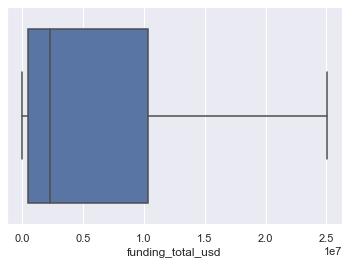

In [40]:
sns.boxplot(rem_ot1['funding_total_usd'])

In [41]:
# For funding_rounds

rem_ot2 = df.copy()
rem_ot2.loc[(rem_ot2['funding_rounds']>fr_upper_limit), 'funding_rounds'] = fr_upper_limit
rem_ot2.loc[(rem_ot2['funding_rounds']<fr_lower_limit), 'funding_rounds'] = fr_lower_limit

<AxesSubplot:xlabel='funding_rounds'>

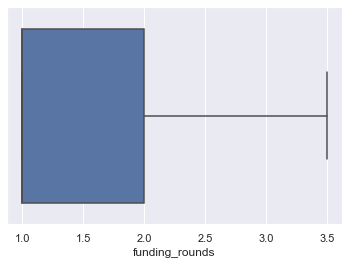

In [42]:
sns.boxplot(rem_ot2['funding_rounds'])

In [43]:
df.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,6.0,34.021122,-118.396467
2,games_video,acquired,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
4,games_video,operating,2008-07-26,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525


#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [44]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [45]:
import datetime

In [46]:
# For founded_at
df['founded_at'] = pd.to_datetime(df['founded_at']).dt.strftime('%Y')

# closed_at
df['closed_at'] = pd.to_datetime(df['closed_at']).dt.strftime('%Y')

# # first_funding_at
df['first_funding_at'] = pd.to_datetime(df['first_funding_at']).dt.strftime('%Y')

# # last_funding_at
df['last_funding_at'] = pd.to_datetime(df['last_funding_at']).dt.strftime('%Y')

# # first_milestone_at
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at']).dt.strftime('%Y')

# # last_milestone_at
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at']).dt.strftime('%Y')

df

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005,2010,USA,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,2005,2010,USA,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,2010,2013,5.0,6.0,34.021122,-118.396467
2,games_video,acquired,2005,2010,USA,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,2003,2011,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008,2010,USA,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,2003,2011,4.0,12.0,37.562992,-122.325525
4,games_video,operating,2008,2010,USA,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,2003,2011,4.0,12.0,37.562992,-122.325525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,2012,USA,2013-11-04,2013-11-04,1.0,2007,2008,2.0,500000.0,2013,2013,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,2012,USA,2013-11-04,2013-11-04,1.0,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,2012,USA,2013-11-04,2013-11-04,1.0,2008,2008,1.0,750000.0,2012,2013,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,2012,USA,2013-11-04,2013-11-04,1.0,2008,2008,1.0,750000.0,2012,2013,3.0,1.0,34.052234,-118.243685


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [47]:
# 1. category_code
df['category_code'].value_counts().sort_values(ascending=False)

software            17562
web                 13573
other                9596
ecommerce            8147
mobile               6257
advertising          5960
games_video          5276
biotech              4787
consulting           4701
enterprise           4311
public_relations     2969
hardware             2897
network_hosting      2394
education            2247
cleantech            1958
search               1855
finance              1232
health               1216
social               1183
security             1165
analytics            1109
medical               959
legal                 801
semiconductor         789
manufacturing         652
travel                651
news                  614
hospitality           568
fashion               543
local                 483
real_estate           439
photo_video           378
music                 377
messaging             340
sports                319
transportation        295
design                244
automotive            228
nonprofit   

In [48]:
df['category_code'].nunique()

42

In [49]:
# # Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# # Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# # remaining one as other.

new_cat=df['category_code'].value_counts()

top_cat= new_cat.head(15).index.tolist()

df['category_code']=df['category_code'].replace({value: 'other' for value in new_cat.index 
                                                     if value not in top_cat})

<AxesSubplot:xlabel='category_code', ylabel='count'>

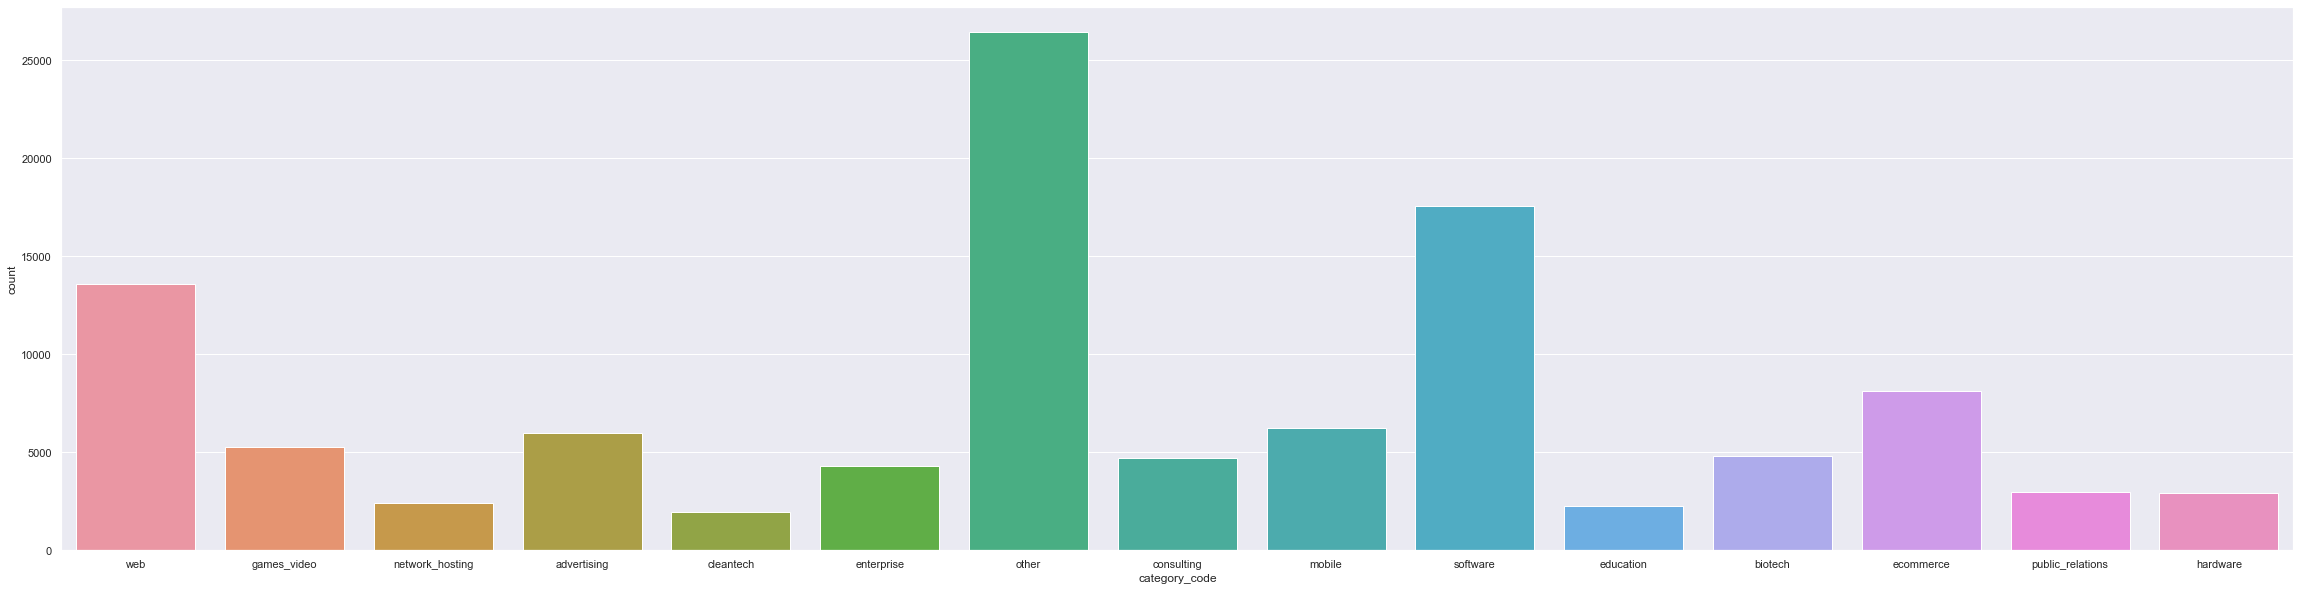

In [50]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

plt.figure(figsize=(40,10))
sns.countplot(data=df, x='category_code')

In [51]:
# Let's check if we've more than 15 columns
#Type your code here!

In [52]:
# One-hot encoding to category_code
#Type your code here!

In [53]:
# Concatenate category with company dataset
#Type your code here!

In [54]:
# Since, We've added the encoded category_columns, let's delete original category_code
#Type your code here!

### Let's encode 'country' column now.

In [55]:
# 1. country_code
df['country_code'].nunique()

175

In [56]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
new_cat1=df['country_code'].value_counts()

top_cat1= new_cat1.head(10).index.tolist()

df['country_code']=df['country_code'].replace({value: 'other' for value in new_cat1.index 
                                                     if value not in top_cat1})

<AxesSubplot:xlabel='country_code', ylabel='count'>

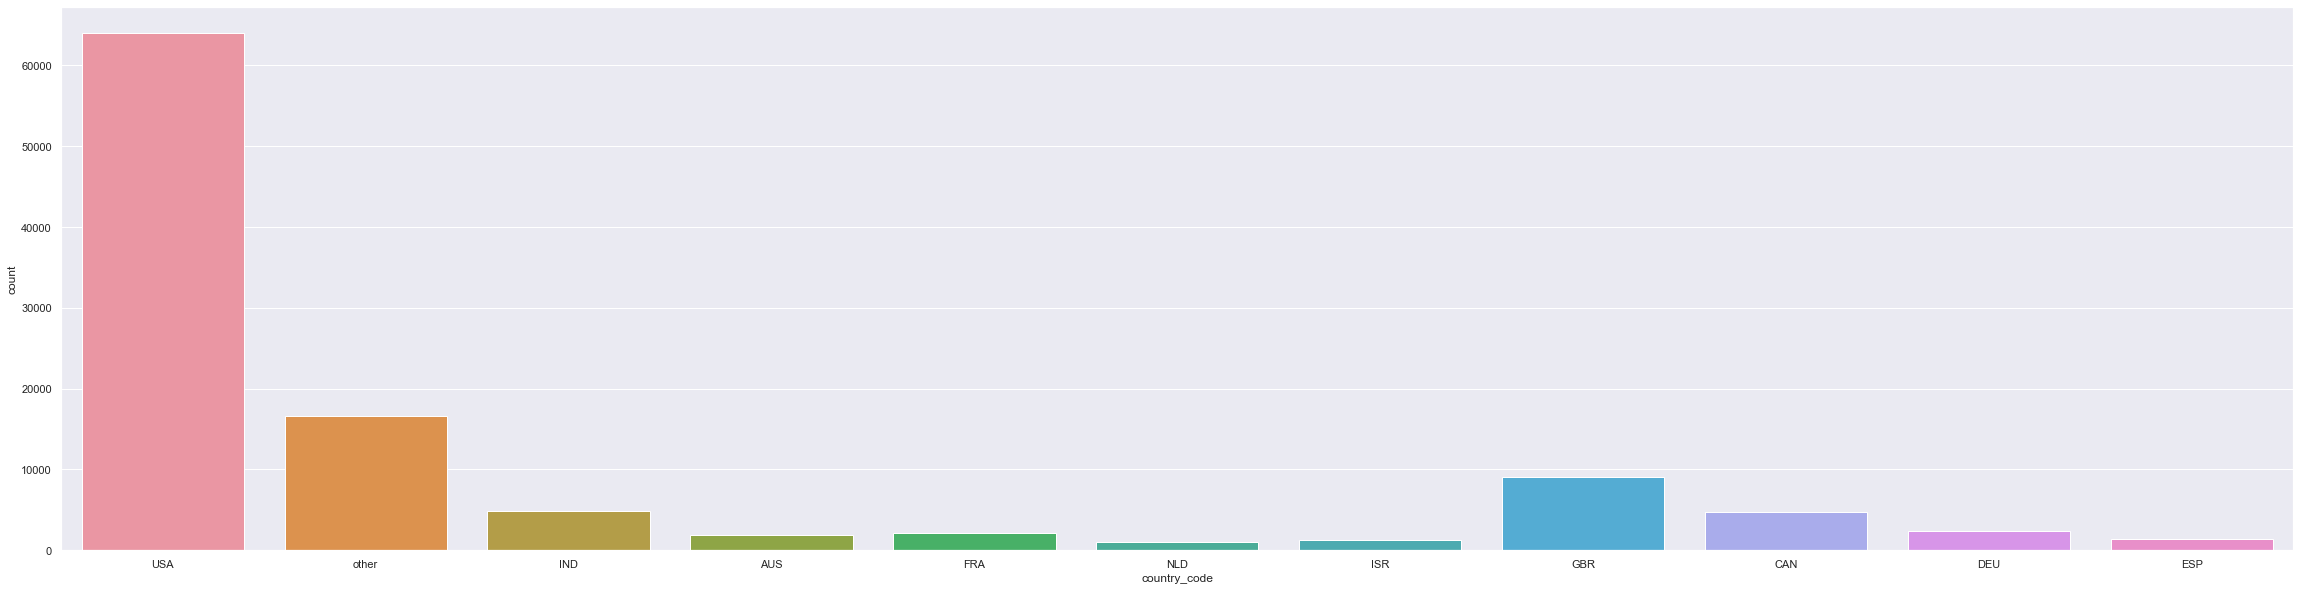

In [57]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

plt.figure(figsize=(40,10))
sns.countplot(data=df, x='country_code')

In [58]:

#one hot encoding of nominal variables
onehot_col=['category_code','country_code']
df_onehot=pd.get_dummies(df[onehot_col])
#adding the one hot encoded columns to the main columns
# Concatenate category with company dataset
df=pd.concat([df,df_onehot],axis=1)

In [59]:
# Since, We've added the encoded country_code , let's delete original category_code
df=df.drop(['category_code','country_code'],axis=1)
df.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,0,1,0
1,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,0,1,0
2,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,0,1,0
3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,0,1,0
4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,0,1,0


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [60]:
df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [61]:
status_comp=['operating','ipo']

#creating a column for company status, in that open : 1 and closed :0 

df['isopen']=df['status'].apply(lambda x: 1 if x in status_comp else 0)
df['isopen'].value_counts()

1    99511
0     9953
Name: isopen, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109464 entries, 0 to 196552
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   status                          109464 non-null  object 
 1   founded_at                      109464 non-null  object 
 2   closed_at                       109464 non-null  object 
 3   first_investment_at             109464 non-null  object 
 4   last_investment_at              109464 non-null  object 
 5   investment_rounds               109464 non-null  float64
 6   first_funding_at                109464 non-null  object 
 7   last_funding_at                 109464 non-null  object 
 8   funding_rounds                  109464 non-null  float64
 9   funding_total_usd               109464 non-null  float64
 10  first_milestone_at              109464 non-null  object 
 11  last_milestone_at               109464 non-null  object 
 12  milestones      

In [63]:
#saving the csv file  with categorical columns
df.to_csv("Companies_preprocessed.csv")

In [64]:
df.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen
0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,1
1,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,0
2,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,0
3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,1
4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109464 entries, 0 to 196552
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   status                          109464 non-null  object 
 1   founded_at                      109464 non-null  object 
 2   closed_at                       109464 non-null  object 
 3   first_investment_at             109464 non-null  object 
 4   last_investment_at              109464 non-null  object 
 5   investment_rounds               109464 non-null  float64
 6   first_funding_at                109464 non-null  object 
 7   last_funding_at                 109464 non-null  object 
 8   funding_rounds                  109464 non-null  float64
 9   funding_total_usd               109464 non-null  float64
 10  first_milestone_at              109464 non-null  object 
 11  last_milestone_at               109464 non-null  object 
 12  milestones      

In [66]:
#reading the preprocessed data
df_data=pd.read_csv('Companies_preprocessed.csv')

## Exploratory Data Analysis
 

### UNIVARIENT DATA ANALYSIS

<AxesSubplot:xlabel='status', ylabel='count'>

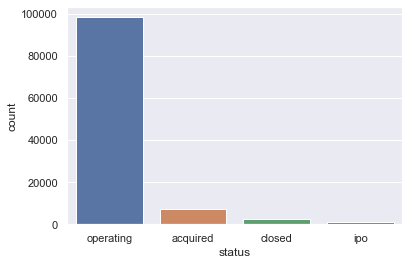

In [67]:
sns.countplot(df_data['status'])

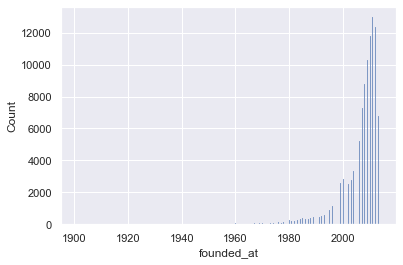

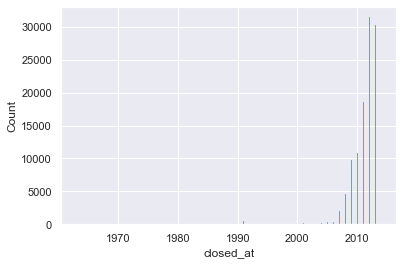

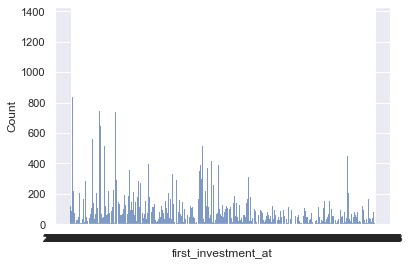

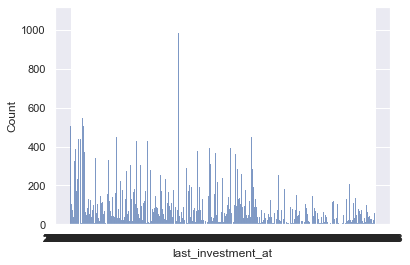

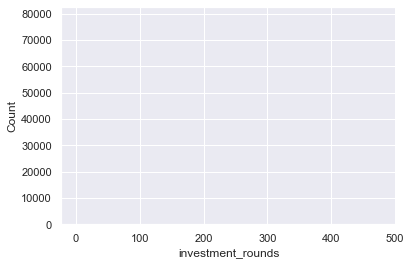

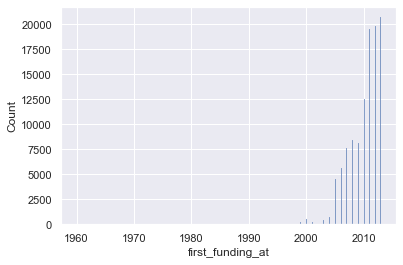

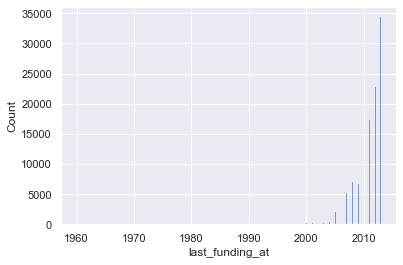

In [68]:
#for all the time related columns we will use histplot
days_col=['founded_at', 'closed_at', 'first_investment_at', 'last_investment_at', 'investment_rounds','first_funding_at',
         'last_funding_at']

for i in days_col:
        plt.figure()
        sns.histplot(data=df_data, x=i)

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

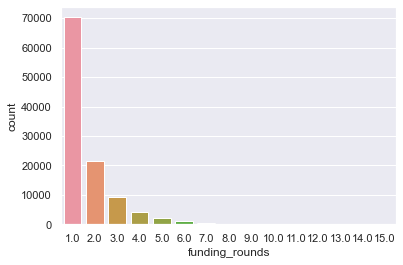

In [69]:
sns.countplot(df_data['funding_rounds'])

####  As stated before most of the companies funding rounds is 1 round only.

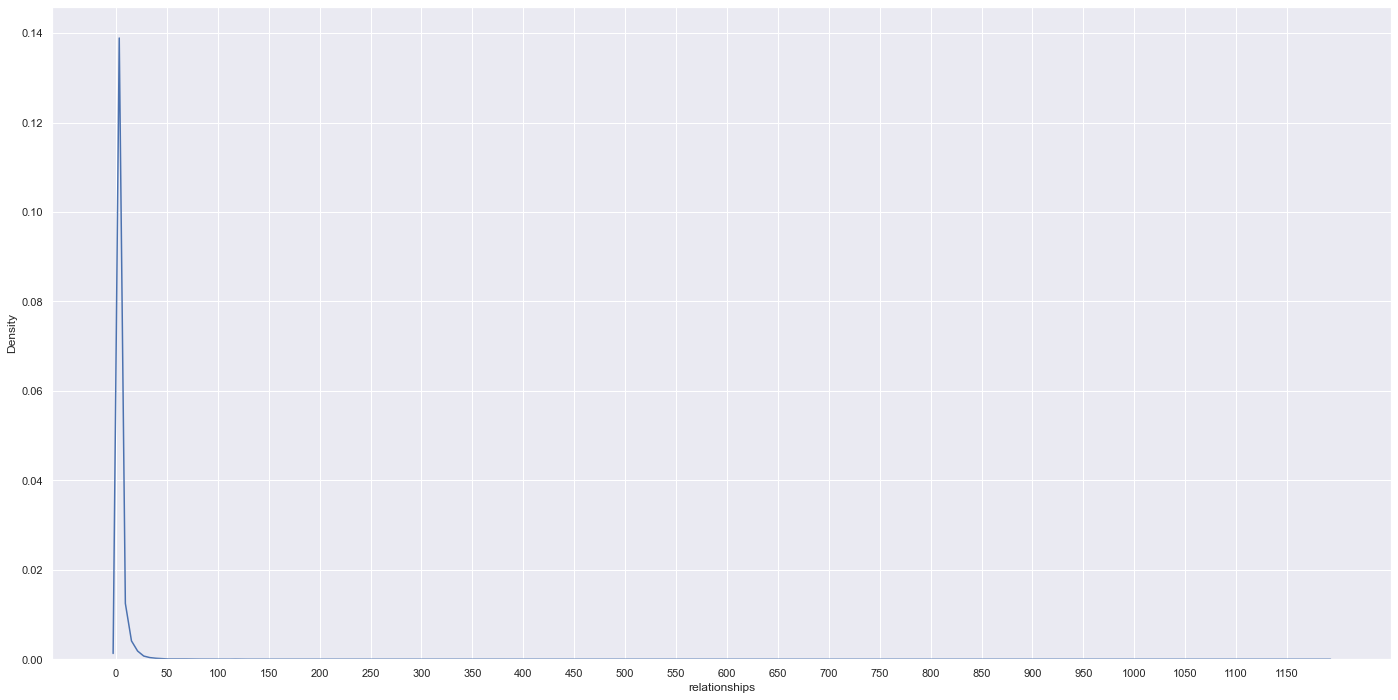

In [70]:
plt.figure(figsize=(24,12))
sns.kdeplot(df_data['relationships'])
plt.xticks(np.arange(0,1200,step=50));

#### we cab see the distribution shows less then 50

### Bivariant Analysis

<AxesSubplot:>

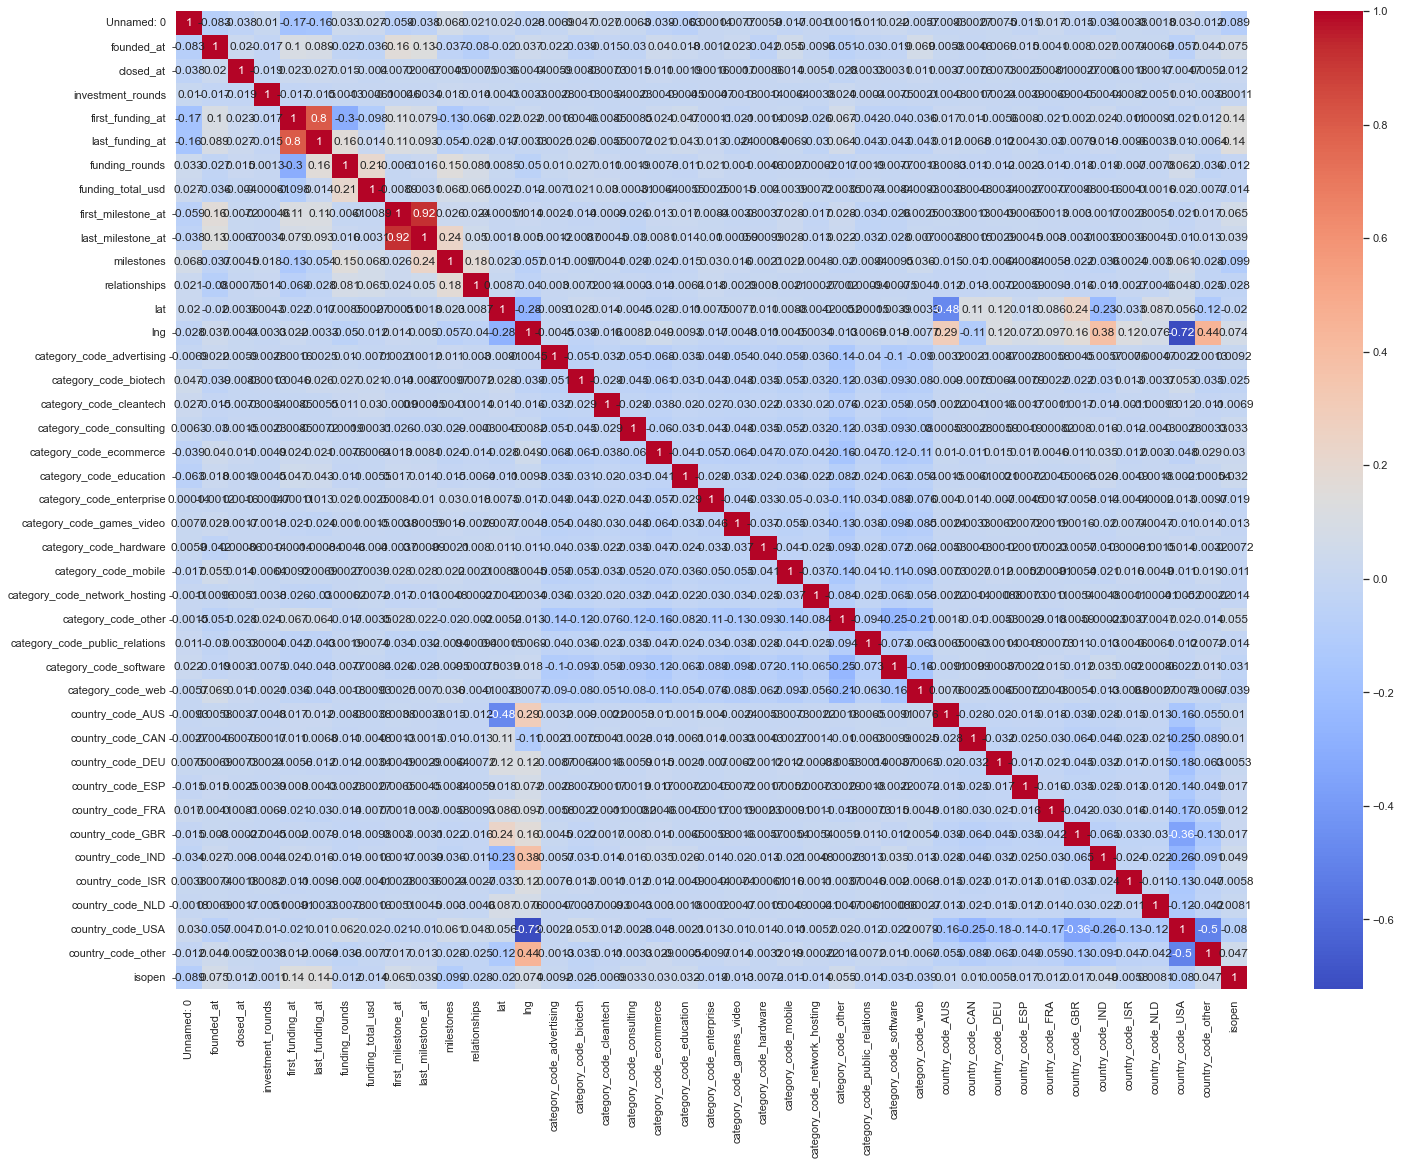

In [71]:
# check corr with heatmap

plt.figure(figsize=(24,18))
corr = df_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

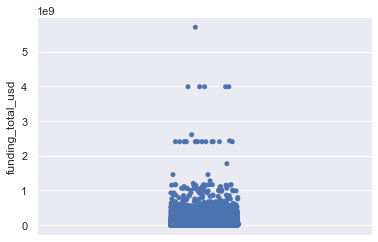

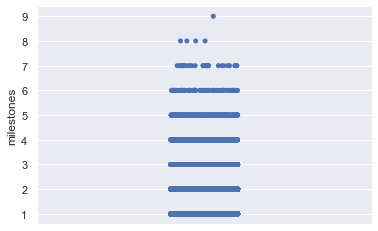

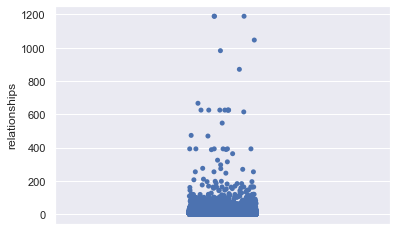

In [72]:
# ckeck relationship status b/w 'status' and other column

new_col = ['funding_total_usd','milestones','relationships']
for i in new_col:
    plt.figure()
    sns.stripplot(data=df_data, y=i, hue= 'status')

## Feature Engineering

#### Feature Creation

In [73]:
df_data.columns

Index(['Unnamed: 0', 'status', 'founded_at', 'closed_at',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng',
       'category_code_advertising', 'category_code_biotech',
       'category_code_cleantech', 'category_code_consulting',
       'category_code_ecommerce', 'category_code_education',
       'category_code_enterprise', 'category_code_games_video',
       'category_code_hardware', 'category_code_mobile',
       'category_code_network_hosting', 'category_code_other',
       'category_code_public_relations', 'category_code_software',
       'category_code_web', 'country_code_AUS', 'country_code_CAN',
       'country_code_DEU', 'country_code_ESP', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA'

In [74]:
df_data['fundrase_round']= df_data['funding_total_usd']/df_data['funding_rounds']
df_data['_milestones_days']=df_data['first_milestone_at'] - df_data['last_milestone_at']
df_data['days_for_first_milestone']= df_data['founded_at']-df_data['first_milestone_at']

df_data.head()

,Unnamed: 0,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen,fundrase_round,_milestones_days,days_for_first_milestone
0,0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,1,0,1,13250000.0,-3,-5
1,1,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,1,0,0,13250000.0,-3,-5
2,2,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,1,0,0,13250000.0,-8,2
3,3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,1,0,1,13250000.0,-8,5
4,4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,1,0,1,13250000.0,-8,5


### Feature Transformation

In [75]:
df_data['funding_total_usd_robust']=(df_data['funding_total_usd']-df_data['funding_total_usd'].median())/(df_data['funding_total_usd'].quantile(0.75)-df_data['funding_total_usd'].quantile(0.25))




df_data.head()

,Unnamed: 0,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen,fundrase_round,_milestones_days,days_for_first_milestone,funding_total_usd_robust
0,0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,1,0,1,13250000.0,-3,-5,3.813977
1,1,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,1,0,0,13250000.0,-3,-5,3.813977
2,2,acquired,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,1,0,0,13250000.0,-8,2,3.813977
3,3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,1,0,1,13250000.0,-8,5,3.813977
4,4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,1,0,1,13250000.0,-8,5,3.813977


## Feature Selection

#### we performing feature selection using the mutual information score function with the mi scores method to select with the  features from the input data X based on their mutual information with the target variable y.

In [76]:
from sklearn.feature_selection import mutual_info_regression
X = df_data.copy()
y = X.pop("isopen")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

def get_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = get_mi_scores(X, y, discrete_features)
mi_scores[:]  # show features with their MI scores


status                            0.306902
Unnamed: 0                        0.023795
last_funding_at                   0.011899
founded_at                        0.011830
first_funding_at                  0.011680
last_investment_at                0.011093
funding_total_usd_robust          0.010474
lng                               0.009018
first_investment_at               0.008732
funding_total_usd                 0.007198
fundrase_round                    0.006293
milestones                        0.004944
lat                               0.004871
country_code_IND                  0.004678
first_milestone_at                0.004632
category_code_games_video         0.004456
_milestones_days                  0.003460
country_code_USA                  0.002683
last_milestone_at                 0.002449
category_code_ecommerce           0.002448
category_code_network_hosting     0.002295
category_code_biotech             0.002220
category_code_advertising         0.002156
country_cod

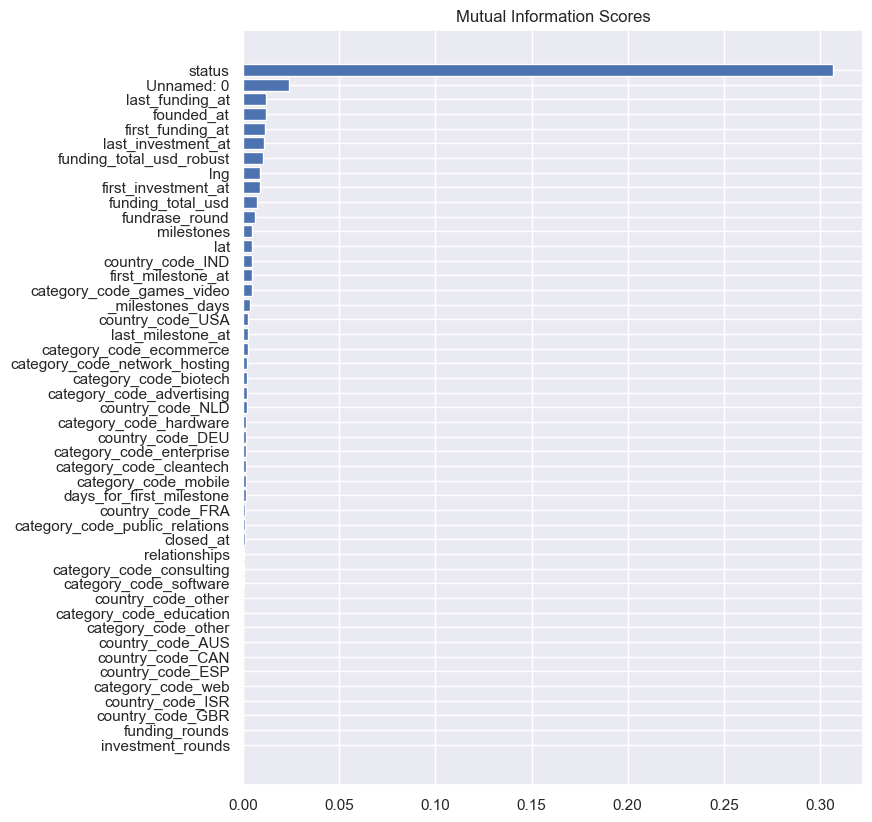

In [77]:
#making a plot to show these ML results
def mi_score_plot(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
mi_score_plot(mi_scores)

In [78]:
df_data.info()
df_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109464 entries, 0 to 109463
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      109464 non-null  int64  
 1   status                          109464 non-null  object 
 2   founded_at                      109464 non-null  int64  
 3   closed_at                       109464 non-null  int64  
 4   first_investment_at             109464 non-null  object 
 5   last_investment_at              109464 non-null  object 
 6   investment_rounds               109464 non-null  float64
 7   first_funding_at                109464 non-null  int64  
 8   last_funding_at                 109464 non-null  int64  
 9   funding_rounds                  109464 non-null  float64
 10  funding_total_usd               109464 non-null  float64
 11  first_milestone_at              109464 non-null  int64  
 12  last_milestone_a

,Unnamed: 0,founded_at,closed_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen,fundrase_round,_milestones_days,days_for_first_milestone,funding_total_usd_robust
count,109464.000000,109464.000000,109464.000000,109464.000000,109464.000000,109464.000000,109464.000000,1.094640e+05,109464.000000,109464.000000,...,109464.000000,109464.000000,109464.000000,109464.000000,109464.000000,109464.000000,1.094640e+05,109464.000000,109464.000000,109464.000000
mean,100487.109095,2005.422815,2011.164995,2.889635,2010.056676,2010.869007,1.668421,1.446537e+07,2009.078190,2009.655805,...,0.044362,0.012141,0.009875,0.585343,0.151310,0.909075,8.641269e+06,-0.577615,-3.655375,1.238944
std,63238.071724,10.217828,2.385419,15.221816,2.801817,2.461679,1.195310,6.315171e+07,4.840273,4.724842,...,0.205898,0.109516,0.098884,0.492665,0.358352,0.287504,4.526637e+07,1.919677,10.586544,6.431487
min,0.000000,1901.000000,1963.000000,1.000000,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.910000e+02,-46.000000,-110.000000,-0.234207
25%,37063.750000,2004.000000,2010.000000,1.000000,2008.000000,2010.000000,1.000000,4.898282e+05,2008.000000,2009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.750000e+05,0.000000,-5.000000,-0.184351
50%,110279.500000,2008.000000,2012.000000,1.000000,2011.000000,2012.000000,1.000000,2.300000e+06,2010.000000,2011.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.680511e+06,0.000000,-1.000000,0.000000
75%,158272.250000,2011.000000,2013.000000,2.000000,2012.000000,2013.000000,2.000000,1.030898e+07,2012.000000,2012.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.500000e+06,0.000000,0.000000,0.815649
max,196552.000000,2014.000000,2014.000000,478.000000,2013.000000,2013.000000,15.000000,5.700000e+09,2014.000000,2014.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.600000e+09,0.000000,53.000000,580.264268


In [79]:
#making sure that it doesn't contain negative values( some colsed dates in raw data are not logical they preceed the foundation date)
df_data=df_data.loc[df_data['days_for_first_milestone']>=0,:]
#checking
df_data.describe()

,Unnamed: 0,founded_at,closed_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen,fundrase_round,_milestones_days,days_for_first_milestone,funding_total_usd_robust
count,46888.000000,46888.000000,46888.000000,46888.000000,46888.000000,46888.000000,46888.000000,4.688800e+04,46888.000000,46888.000000,...,46888.000000,46888.000000,46888.000000,46888.000000,46888.000000,46888.000000,4.688800e+04,46888.000000,46888.000000,46888.000000
mean,95225.006548,2009.716985,2011.202504,2.673669,2010.321639,2011.000960,1.579807,1.219510e+07,2007.453442,2008.137306,...,0.051335,0.011559,0.010621,0.553532,0.170470,0.933309,7.867013e+06,-0.683864,2.263543,1.007735
std,63076.007709,3.631865,2.418983,11.495272,2.702259,2.387195,1.093974,5.151395e+07,6.116535,6.038265,...,0.220683,0.106893,0.102511,0.497131,0.376049,0.249488,4.372546e+07,2.424428,4.791697,5.246276
min,2.000000,1960.000000,1963.000000,1.000000,1960.000000,1960.000000,1.000000,1.000000e+03,1960.000000,1960.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,-43.000000,0.000000,-0.234134
25%,34000.750000,2009.000000,2010.000000,1.000000,2009.000000,2010.000000,1.000000,3.250000e+05,2006.000000,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.621600e+05,0.000000,0.000000,-0.201138
50%,93758.000000,2011.000000,2012.000000,1.000000,2011.000000,2012.000000,1.000000,1.700000e+06,2009.000000,2010.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.300000e+06,0.000000,0.000000,-0.061105
75%,155532.000000,2012.000000,2013.000000,2.000000,2012.000000,2013.000000,2.000000,8.500000e+06,2011.000000,2012.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.500000e+06,0.000000,2.000000,0.631419
max,196552.000000,2014.000000,2014.000000,478.000000,2013.000000,2013.000000,15.000000,2.400000e+09,2014.000000,2014.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.400000e+09,0.000000,53.000000,244.186187


In [80]:
#saving the csv file
df_data.to_csv("Companies_feature_eng.csv")